In [1]:
from pathlib import Path
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = Path("../../data/hyper_top_10.txt")

def read_keras_tuner_json():
    NotImplemented

def read_keras_tuner_console(data: Path) -> list:
    """Read the top 10 trials from a keras tuner console log."""

    num_configs = 0
    num_hyper_params = 0
    hyper_param_index = 0

    configs = [] # dim: num_configs x num_hyper_params
    hyper_params = [] # dim: num_hyper_params

    with open(data, mode="r") as f:
        for l in f: # iterate lines
            if "Trial summary" in l:
                hyper_param_index = 0
                configs.append(hyper_params)
                hyper_params = []
                continue
            if "Hyperparameters:" in l:
                num_configs += 1
                continue
            if "Score:" in l:
                num_hyper_params = hyper_param_index
                #continue
            hyper_param_index += 1
            rhs = l.split(":")[1] # right hand side of ":"
            only_floats = "".join(c for c in rhs if c.isdigit() or ".")
            hyper_params.append(float(only_floats))

        configs.pop(0)
        configs.append(hyper_params)

    return configs


Parameters:
[12.0, 5.0, 3.0, 12.0, 5.0, 3.0, 15.0, 2.0, 1.0, 9.0, 0.09494802292221387, 0.08260564506053925]
[8.0, 2.0, 3.0, 9.0, 2.0, 2.0, 15.0, 5.0, 1.0, 7.0, 0.09510840726518204, 0.09005895256996155]
[12.0, 5.0, 2.0, 11.0, 5.0, 3.0, 8.0, 3.0, 1.0, 3.0, 0.052667414105810786, 0.097529835999012]
[9.0, 4.0, 3.0, 12.0, 4.0, 2.0, 10.0, 2.0, 1.0, 11.0, 0.046515366706961006, 0.10083610564470291]
[14.0, 3.0, 1.0, 16.0, 1.0, 1.0, 13.0, 2.0, 2.0, 13.0, 0.08558810445493052, 0.10328630357980728]
[15.0, 1.0, 4.0, 12.0, 3.0, 2.0, 11.0, 4.0, 3.0, 10.0, 0.05739694270691549, 0.11557261645793915]
[9.0, 2.0, 3.0, 9.0, 5.0, 3.0, 16.0, 3.0, 3.0, 16.0, 0.054904251644631925, 0.1206287145614624]
[14.0, 2.0, 3.0, 16.0, 3.0, 1.0, 9.0, 4.0, 4.0, 13.0, 0.06119950098675664, 0.12506680190563202]
[10.0, 5.0, 3.0, 14.0, 3.0, 2.0, 14.0, 4.0, 3.0, 11.0, 0.033810977264055284, 0.14138253033161163]
[8.0, 5.0, 2.0, 15.0, 3.0, 2.0, 14.0, 4.0, 4.0, 8.0, 0.050236800673040524, 0.14349685609340668]

K-mean labels per parameter

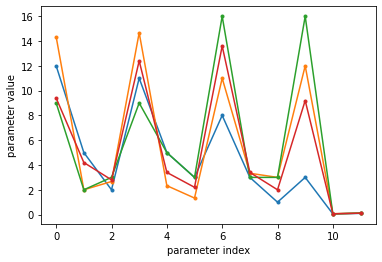

In [5]:
params = read_keras_tuner_console(DATA_PATH)
print("Parameters:")
for p in params:
    print(p)
print("")

kmeans = KMeans(n_clusters=4, random_state=0).fit(params)
print("K-mean labels per parameter set:")
print(kmeans.labels_)
print("")

print("Cluster centers:")
for c in kmeans.cluster_centers_:
    print(c)
print("")


num_params = len(kmeans.cluster_centers_[1])

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('parameter value')
ax.set_xlabel('parameter index')
for vec in kmeans.cluster_centers_:
    plt.plot(list(range(num_params)), vec, marker=".")

params = np.array(params)
mean_params = np.mean(params, axis=0)
round_params = np.round(mean_params)
print("Mean among of parameters:")
print(mean_params)
print("Rounded mean of parameters:")
print(round_params)


In [ ]:
"""
key:
filters1
kernel_size1
strides1
filters2
kernel_size2
strides2
filters3
kernel_size3
strides3
units
learning_rate
Score
"""

single_best = [12, 5, 3, 12, 5, 3, 15, 2, 1, 9, 0.09494802, 0.08260564]
best_in_k4  = [12, 5, 2, 11, 5, 3, 8 , 3, 1, 3, 0.05266741, 0.09752984]
rounded_mean= [11, 3, 3, 13, 3, 2, 12, 3, 2, 10,0.06323758,  0.11204644]

# human judgement around mode if present, mean and the single best
final = [12, 5, 3, 12, 5, 3, 12, 3, 1, 9, 0.09]